In [1]:
import numpy as np
import pandas as pd
from pulp import *
import matplotlib.pyplot
import sklearn
import networkx as nx
graph = nx.Graph()
import random

In [3]:
#importing data 
df = pd.read_csv("zomato2.csv")
data_country=pd.read_excel("Country-code.xlsx")

In [4]:
#get the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#Basic statistics of the data
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
#find null in the dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#merge the country list to use it to aggregate by country name
df_byCountry=pd.merge(df,data_country,on='Country Code',how='left')
df_byCountry.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [8]:
#Count the number of restaurants in a perticular country
df_byCountry.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [9]:
#Group by country to get the mean values of inteval variables
df_byCountry.groupby("Country").mean()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country,,,,,,,,
Australia,1.672914e+07,14.0,144.601833,-33.764464,24.083333,2.125000,3.658333,111.416667
Brazil,6.869641e+06,30.0,-45.932703,-20.780126,134.666667,3.400000,3.763333,19.616667
Canada,1.665633e+07,37.0,-93.700900,47.200881,36.250000,2.500000,3.575000,103.000000
India,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
Indonesia,1.159798e+07,94.0,101.757266,-5.980983,281190.476190,2.952381,4.295238,772.095238
New Zealand,8.469621e+06,148.0,174.770018,-38.156311,69.750000,3.150000,4.262500,243.025000
Phillipines,8.472714e+06,162.0,121.036126,14.518302,1606.818182,3.363636,4.468182,407.409091
Qatar,1.100843e+07,166.0,51.512866,25.286205,223.750000,3.650000,4.060000,163.800000
Singapore,1.848435e+07,184.0,103.848734,1.293916,155.750000,3.650000,3.575000,31.900000


# Linear Programming

In [10]:
#subset the dataset to manchester
df3 = df[df['City']=='Manchester']

In [11]:
df3.shape

(20, 21)

In [12]:
df3.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9397,6800280,Monolos Playhouse Restaurant,215,Manchester,"137 Cheetham Hill Road, Cheetham Hill, Manches...",Cheetham Hill,"Cheetham Hill, Manchester",-2.239385,53.494691,"American, Fast Food, Desserts, Steak",...,Pounds(å£),No,No,No,No,2,3.3,Orange,Average,14
9398,6800443,Santos,215,Manchester,"22 King Edward's Buildings, Bury Old Road, Che...",Cheetham Hill,"Cheetham Hill, Manchester",-2.246548,53.513525,"Pizza, Fast Food",...,Pounds(å£),No,No,No,No,2,3.3,Orange,Average,23
9399,6801867,Manchester House,215,Manchester,"Tower 12, 18-22 Bridge Street, Deansgate, Manc...",Deansgate,"Deansgate, Manchester",-2.250806,53.481240,British,...,Pounds(å£),No,No,No,No,4,4.0,Green,Very Good,52
9400,6800235,The Grill On The Alley,215,Manchester,"5 RIdgefield, Deansgate, Manchester M2 6EG",Deansgate,"Deansgate, Manchester",-2.247333,53.480833,"Steak, Seafood, Grill",...,Pounds(å£),No,No,No,No,3,4.4,Green,Very Good,704
9401,6801051,Nawaab,215,Manchester,"1008 Stockport Road, Levenshulme, Manchester M...",Levenshulme,"Levenshulme, Manchester",-2.189833,53.441833,"Pakistani, Indian, Afghani, Curry",...,Pounds(å£),No,No,No,No,2,3.9,Yellow,Good,150


In [13]:
#Create new columns to segregate the primary, secondary and tertiary cuisines
new = df3['Cuisines'].str.split(',',n=3,expand = True)
df3['Primary_Cuisine'] = new[0]
df3['Secondary_Cuisine'] = new[1]
df3['Tertiary_Cuisine'] = new[2]

df3_1 = df3[['Restaurant ID', 
             'Restaurant Name',
             'Primary_Cuisine',
             'Secondary_Cuisine',
             'Tertiary_Cuisine',
             'Average Cost for two',
             'Aggregate rating']]

/var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ipykernel_37133/2316335881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Primary_Cuisine'] = new[0]
/var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ipykernel_37133/2316335881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Secondary_Cuisine'] = new[1]
/var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ipykernel_37133/2316335881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [14]:
#Genralize the cuisines to create LP objective
l1 = ['American','Burger','Pizza']
l2 = ['Indian','Pakistani','Thai']
l3 = ['European','French','British','Italian']
df3_1['Primary_Cuisine_Type'] = np.where(df3_1['Primary_Cuisine'].isin(l1),'Fast Food',
                                         np.where(df3_1['Primary_Cuisine'].isin(l2),'Asian',
                                         np.where(df3_1['Primary_Cuisine'].isin(l3),'European','Others')))

/var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ipykernel_37133/917044219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_1['Primary_Cuisine_Type'] = np.where(df3_1['Primary_Cuisine'].isin(l1),'Fast Food',


In [15]:
#Subset the required columns to a new table
df3_2 = df3_1[['Restaurant ID',
               'Restaurant Name',
               'Primary_Cuisine_Type',
               'Average Cost for two',
               'Aggregate rating']]

In [16]:
df3_2.head()

,Restaurant ID,Restaurant Name,Primary_Cuisine_Type,Average Cost for two,Aggregate rating
9397,6800280,Monolos Playhouse Restaurant,Fast Food,30,3.3
9398,6800443,Santos,Fast Food,20,3.3
9399,6801867,Manchester House,European,85,4.0
9400,6800235,The Grill On The Alley,Others,55,4.4
9401,6801051,Nawaab,Asian,35,3.9


In [17]:
#Create dummy columns to identify the type of cuisines served by each restaurant
df3_3 = pd.get_dummies(df3_2, columns=['Primary_Cuisine_Type'])

In [19]:
#filter the table to consider only 3.5 rating restaurants
df3_4 = df3_3[df3_3["Aggregate rating"]>3.5]

In [20]:
#pass the dataset to lp optimizer
restaurant = pulp.LpVariable.dicts('Restaurant',(name for name in df3_4['Restaurant Name']),
                                   lowBound=0, upBound=3,
                                   cat='Continuous')

In [21]:
#define problem
prob = LpProblem(name="Restaurants", sense=LpMinimize)

In [22]:
#add objective
prob += lpSum([restaurant[df3_4.loc[i,'Restaurant Name']]*int(df3_4.loc[i,'Average Cost for two']) 
               for i in df3_4.index])

#add contraints
#European restaurant for atleast 8 times
prob += lpSum([restaurant[df3_4.loc[i,'Restaurant Name']]*int(df3_4.loc[i,'Primary_Cuisine_Type_European']) 
               for i in df3_4.index]) >=8
#Fast food restaurants for atleast 5 times
prob += lpSum([restaurant[df3_4.loc[i,'Restaurant Name']]*int(df3_4.loc[i,'Primary_Cuisine_Type_Fast Food']) 
               for i in df3_4.index]) >=5
#Asian restaurant for atleast 4 times
prob += lpSum([restaurant[df3_4.loc[i,'Restaurant Name']]*int(df3_4.loc[i,'Primary_Cuisine_Type_Asian']) 
               for i in df3_4.index])>=4
#other cuisine for atleast twice
prob += lpSum([restaurant[df3_4.loc[i,'Restaurant Name']]*int(df3_4.loc[i,'Primary_Cuisine_Type_Others']) 
               for i in df3_4.index])>=2


prob

Restaurants:
MINIMIZE
30*Restaurant_Akbars + 40*Restaurant_Almost_Famous_Burgers + 70*Restaurant_Chaophraya + 80*Restaurant_Gaucho + 30*Restaurant_Home_Sweet_Home + 50*Restaurant_Jamie's_Italian + 25*Restaurant_Lahore + 85*Restaurant_Manchester_House + 55*Restaurant_Mr_Cooper's_House_&_Garden___The_Midland + 35*Restaurant_Mughli + 35*Restaurant_Nawaab + 25*Restaurant_San_Carlo + 50*Restaurant_Solita + 45*Restaurant_Teacup + 160*Restaurant_The_French_by_Simon_Rogan___The_Midland + 55*Restaurant_The_Grill_On_The_Alley + 50*Restaurant_Zouk_Tea_Bar_&_Grill + 0
SUBJECT TO
_C1: Restaurant_Home_Sweet_Home + Restaurant_Jamie's_Italian
 + Restaurant_Manchester_House
 + Restaurant_Mr_Cooper's_House_&_Garden___The_Midland + Restaurant_San_Carlo
 + Restaurant_Teacup + Restaurant_The_French_by_Simon_Rogan___The_Midland >= 8

_C2: Restaurant_Almost_Famous_Burgers + Restaurant_Solita >= 5

_C3: Restaurant_Akbars + Restaurant_Chaophraya + Restaurant_Lahore
 + Restaurant_Mughli + Restaurant_Nawaab + Re

In [23]:
#solve the proble using pulp solver
prob.solve()
LpStatus[prob.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/amaltom/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ed4da97d8dab483f90ad2021a9ce65d9-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ed4da97d8dab483f90ad2021a9ce65d9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 44 RHS
At line 49 BOUNDS
At line 67 ENDATA
Problem MODEL has 4 rows, 17 columns and 17 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4 (0) rows, 16 (-1) columns and 16 (-1) elements
0  Obj 170.99999 Primal inf 15.199996 (4)
4  Obj 690
Optimal - objective value 690
After Postsolve, objective 690, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 690 - 4 iterations time 0.002, Presolve 0.00
Option for printingOptions cha

'Optimal'

In [24]:
#print the results
for i in restaurant:
    print('Visit to', restaurant[i], 'will be : ', restaurant[i].varValue)
    
print("\nThe minimum amount he will spend in a month is ",value(prob.objective))

Visit to Restaurant_Manchester_House will be :  0.0
Visit to Restaurant_The_Grill_On_The_Alley will be :  2.0
Visit to Restaurant_Nawaab will be :  0.0
Visit to Restaurant_Jamie's_Italian will be :  0.0
Visit to Restaurant_Chaophraya will be :  0.0
Visit to Restaurant_Solita will be :  2.0
Visit to Restaurant_Almost_Famous_Burgers will be :  3.0
Visit to Restaurant_Home_Sweet_Home will be :  3.0
Visit to Restaurant_Teacup will be :  2.0
Visit to Restaurant_Zouk_Tea_Bar_&_Grill will be :  0.0
Visit to Restaurant_Mughli will be :  0.0
Visit to Restaurant_Lahore will be :  3.0
Visit to Restaurant_Gaucho will be :  0.0
Visit to Restaurant_Akbars will be :  1.0
Visit to Restaurant_San_Carlo will be :  3.0
Visit to Restaurant_Mr_Cooper's_House_&_Garden___The_Midland will be :  0.0
Visit to Restaurant_The_French_by_Simon_Rogan___The_Midland will be :  0.0

The minimum amount he will spend in a month is  690.0


# Graph Application

In [25]:
#filter the dataset to Mumbai
df1 = df[df['City']=='Mumbai']

In [26]:
df1['Longitude'].dtypes

dtype('float64')

In [27]:
#function to find the distance between two restaurants using longitude and latitude
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [28]:
# driver code for testing the function
lat1 = 53.32055555555556
lat2 = 53.31861111111111
lon1 = -1.7297222222222221
lon2 =  -1.6997222222222223
print(distance(lat1, lat2, lon1, lon2), "K.M")

2.0043678382716137 K.M


In [29]:
#subset of data that is requred for calculations
df2 = df1[['Restaurant ID','Restaurant Name', 'Country Code', 'City','Longitude', 'Latitude']]

In [47]:
df2

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude
2480,35217,Joey's Pizza,1,Mumbai,72.829976,19.126630
2481,18447068,Cafe Hydro,1,Mumbai,72.862381,19.221315
2482,18458563,The American Joint,1,Mumbai,72.841347,19.223840
2483,18075122,The Fusion Kitchen,1,Mumbai,72.848923,19.254567
2484,18233317,145 Kala Ghoda,1,Mumbai,72.832585,18.927584
2485,18237753,Tea Villa Cafe,1,Mumbai,72.833984,19.055831
2486,18388642,Grandmama's Cafe,1,Mumbai,72.827808,19.091458
2487,18463285,Mumbai Vibe,1,Mumbai,72.832658,19.065838
2488,16527711,The Rolling Pin,1,Mumbai,72.825203,18.994049
2489,18313566,Farzi Cafe,1,Mumbai,72.827650,19.003517


In [30]:
#use self merge to join every restaurat with every other restaurant
df2_self_merge = df2.merge(df2,on = 'City', how='inner', suffixes=('_pri','_sec'))

In [31]:
df2_self_merge.head()

,Restaurant ID_pri,Restaurant Name_pri,Country Code_pri,City,Longitude_pri,Latitude_pri,Restaurant ID_sec,Restaurant Name_sec,Country Code_sec,Longitude_sec,Latitude_sec
0,35217,Joey's Pizza,1,Mumbai,72.829976,19.12663,35217,Joey's Pizza,1,72.829976,19.126630
1,35217,Joey's Pizza,1,Mumbai,72.829976,19.12663,18447068,Cafe Hydro,1,72.862381,19.221315
2,35217,Joey's Pizza,1,Mumbai,72.829976,19.12663,18458563,The American Joint,1,72.841347,19.223840
3,35217,Joey's Pizza,1,Mumbai,72.829976,19.12663,18075122,The Fusion Kitchen,1,72.848923,19.254567
4,35217,Joey's Pizza,1,Mumbai,72.829976,19.12663,18233317,145 Kala Ghoda,1,72.832585,18.927584


In [35]:
#user input to get the current location of Adam
RestID = 0
RestName="Starting Point"
CountCode=0
City=input("Enter City to visit : ")
Long=float(input("Enter Longitude : "))
Lat=float(input("Enter Latitude : "))


Enter City to visit : Mumbai
Enter Longitude : 71.4
Enter Latitude : 18.9


In [36]:
#add the current location to the main table
data=[[RestID,RestName,CountCode,City,Long,Lat]]

df3_temp = pd.DataFrame(data, columns=['Restaurant ID', 'Restaurant Name','Country Code','City','Longitude','Latitude'])
df2_temp= df2.append(df3_temp,ignore_index=True)


In [37]:
#self merge
df2_self_merge_temp = df2_temp.merge(df2_temp,on = 'City', how='inner', suffixes=('_pri','_sec'))
df2_self_merge_copy = df2_self_merge_temp.round(3)

In [38]:
#calculate the distances
df2_self_merge_copy['distance'] = df2_self_merge_copy.apply(lambda x: distance(x.Latitude_pri,
                                                                               x.Latitude_sec,
                                                                               x.Longitude_pri,
                                                                               x.Longitude_sec), axis=1)

df2_self_merge_copy = df2_self_merge_copy.round(3)
Least_distance = df2_self_merge_copy[df2_self_merge_copy['Restaurant ID_pri']==0]['distance'].min()

In [39]:
#steps to randomize the path connected
index_drop = df2_self_merge_copy[((df2_self_merge_copy['Restaurant ID_pri']==0) &
                                  (df2_self_merge_copy['distance']==Least_distance))].index


In [40]:
df2_self_merge_copy = df2_self_merge_copy.drop(index_drop)

In [41]:
list_0dis = list(df2_self_merge_copy[df2_self_merge_copy['distance']==0].index)
for j in list_0dis:
    df2_self_merge_copy = df2_self_merge_copy.drop(j)

In [42]:
Restaurant_list = list(df2_self_merge_copy['Restaurant ID_pri'])
Restaurant_list = list(set(Restaurant_list))
Restaurant_list

[18270976,
 0,
 35217,
 17806994,
 18435740,
 18388642,
 18318116,
 18216876,
 18463285,
 18237753,
 18458563,
 34757,
 49486,
 18447068,
 18313566,
 16527711,
 18233317,
 18408295,
 49003,
 18441580,
 18075122]

In [43]:
for i in Restaurant_list:
    list1 = list(df2_self_merge_copy[df2_self_merge_copy['Restaurant ID_pri']==i].index)
    random.shuffle(list1)
    k=0
    for j in list1:
        if k == len(list1)-2:
            break
        k+=1
        df2_self_merge_copy = df2_self_merge_copy.drop(j)

In [44]:
df2_self_merge_copy

,Restaurant ID_pri,Restaurant Name_pri,Country Code_pri,City,Longitude_pri,Latitude_pri,Restaurant ID_sec,Restaurant Name_sec,Country Code_sec,Longitude_sec,Latitude_sec,distance
3,35217,Joey's Pizza,1,Mumbai,72.830,19.127,18075122,The Fusion Kitchen,1,72.849,19.255,14.372
19,35217,Joey's Pizza,1,Mumbai,72.830,19.127,49486,Tea Villa Cafe,1,72.847,19.103,3.211
27,18447068,Cafe Hydro,1,Mumbai,72.862,19.221,18388642,Grandmama's Cafe,1,72.828,19.091,14.890
33,18447068,Cafe Hydro,1,Mumbai,72.862,19.221,34757,Joey's Pizza,1,72.835,19.178,5.559
46,18458563,The American Joint,1,Mumbai,72.841,19.224,18233317,145 Kala Ghoda,1,72.833,18.928,32.924
51,18458563,The American Joint,1,Mumbai,72.841,19.224,18313566,Farzi Cafe,1,72.828,19.004,24.501
67,18075122,The Fusion Kitchen,1,Mumbai,72.849,19.255,18233317,145 Kala Ghoda,1,72.833,18.928,36.400
69,18075122,The Fusion Kitchen,1,Mumbai,72.849,19.255,18388642,Grandmama's Cafe,1,72.828,19.091,18.369
89,18233317,145 Kala Ghoda,1,Mumbai,72.833,18.928,18237753,Tea Villa Cafe,1,72.834,19.056,14.233
96,18233317,145 Kala Ghoda,1,Mumbai,72.833,18.928,34757,Joey's Pizza,1,72.835,19.178,27.800


In [45]:
df2_self_merge_copy1 = df2_self_merge_copy[["Restaurant Name_sec","Restaurant Name_pri", "distance"]]
df2_self_merge_copy1= df2_self_merge_copy1.rename(columns = {"Restaurant Name_sec":"Restaurant Name_pri","Restaurant Name_pri":"Restaurant Name_sec"})
df2_self_merge_copy2 = df2_self_merge_copy[["Restaurant Name_pri", "Restaurant Name_sec", "distance"]].append(df2_self_merge_copy1)
df2_self_merge_copy2 = df2_self_merge_copy2.drop_duplicates()

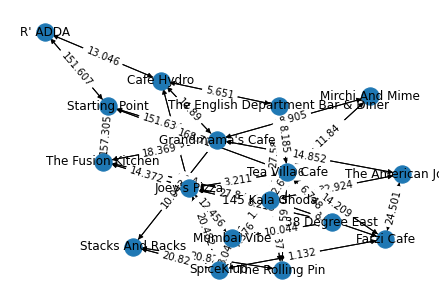

In [46]:
#create a graph for all restaurants
import networkx as nx
import matplotlib.pyplot as plt

G=nx.from_pandas_edgelist(df2_self_merge_copy2, "Restaurant Name_pri", "Restaurant Name_sec", "distance", create_using=nx.DiGraph())

pos= nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

labels = nx.get_edge_attributes(G,'distance')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()


In [47]:
#applying single source Dijkstra algorithm
path = nx.single_source_dijkstra(G,'Starting Point')

In [48]:
path

({'Starting Point': 0,
  'The Fusion Kitchen': 1,
  "Grandmama's Cafe": 1,
  'Tea Villa Cafe': 1,
  "R' ADDA": 1,
  '145 Kala Ghoda': 2,
  "Joey's Pizza": 2,
  'The American Joint': 2,
  'Cafe Hydro': 2,
  'Stacks And Racks': 2,
  'Mirchi And Mime': 2,
  'The Rolling Pin': 2,
  'Farzi Cafe': 2,
  'The English Department Bar & Diner': 2,
  'Mumbai Vibe': 2,
  '38 Degree East': 2,
  'SpiceKlub': 3},
 {'Starting Point': ['Starting Point'],
  'The Fusion Kitchen': ['Starting Point', 'The Fusion Kitchen'],
  "Grandmama's Cafe": ['Starting Point', "Grandmama's Cafe"],
  'Tea Villa Cafe': ['Starting Point', 'Tea Villa Cafe'],
  "R' ADDA": ['Starting Point', "R' ADDA"],
  '145 Kala Ghoda': ['Starting Point', 'The Fusion Kitchen', '145 Kala Ghoda'],
  "Joey's Pizza": ['Starting Point', 'The Fusion Kitchen', "Joey's Pizza"],
  'The American Joint': ['Starting Point',
   "Grandmama's Cafe",
   'The American Joint'],
  'Cafe Hydro': ['Starting Point', "Grandmama's Cafe", 'Cafe Hydro'],
  'Stacks A

### Travelling Salesman Algorithm for the optimal number of visits to restaruants serving Desserts

In [51]:
desserts = ['Desserts']
df2 = df[(df['City']=='Mumbai') & df['Cuisines'].str.contains('Desserts')]
df2 = df2[['Restaurant ID','Restaurant Name', 'Country Code', 'City','Longitude', 'Latitude']]

In [114]:
RestID=0
RestName="Hotel"
CountCode=1
City=input("Enter City to visit: ")
Long=float(input("Enter Longitude: "))
Lat=float(input("Enter Latitude: "))



data=[[RestID,RestName,CountCode,City,Long,Lat]]



df3_temp = pd.DataFrame(data, columns=['Restaurant ID', 'Restaurant Name','Country Code','City','Longitude','Latitude'])
df2_temp= df2.append(df3_temp,ignore_index=True)

Enter City to visit: Mumbai
Enter Longitude: 71.4
Enter Latitude: 18.9


In [115]:
df2_self_merge_copy = df2_temp.merge(df2_temp,on = 'City', how='inner', suffixes=('_pri','_sec'))

In [116]:
df2_self_merge_copy['distance'] = df2_self_merge_copy.apply(lambda x: distance(x.Latitude_pri,
                                                                               x.Latitude_sec,
                                                                               x.Longitude_pri,
                                                                               x.Longitude_sec), axis=1)
df2_self_merge_copy = df2_self_merge_copy.round(3)
Least_distance = df2_self_merge_copy[df2_self_merge_copy['Restaurant ID_pri']==0]['distance'].min()
index_drop = df2_self_merge_copy[((df2_self_merge_copy['Restaurant ID_pri']==0) & (df2_self_merge_copy['distance']==Least_distance))].index
df2_self_merge_copy = df2_self_merge_copy.drop(index_drop)

In [117]:
list_0dis = list(df2_self_merge_copy[df2_self_merge_copy['distance']==0].index)
for j in list_0dis:
    df2_self_merge_copy = df2_self_merge_copy.drop(j)

In [118]:
Restaurant_list = list(df2_self_merge_copy['Restaurant ID_pri'])
Restaurant_list = list(set(Restaurant_list))

In [119]:
for i in Restaurant_list:
    list1 = list(df2_self_merge_copy[df2_self_merge_copy['Restaurant ID_pri']==i].index)
    random.shuffle(list1)
    k=0
    for j in list1:
        if k == len(list1)-2:
            break
        k+=1
        df2_self_merge_copy = df2_self_merge_copy.drop(j)

In [120]:
df2_self_merge_copy1 = df2_self_merge_copy[["Restaurant Name_sec","Restaurant Name_pri", "distance"]]
df2_self_merge_copy1= df2_self_merge_copy1.rename(columns = {"Restaurant Name_sec":"Restaurant Name_pri","Restaurant Name_pri":"Restaurant Name_sec"})
df2_self_merge_copy2 = df2_self_merge_copy[["Restaurant Name_pri", "Restaurant Name_sec", "distance"]].append(df2_self_merge_copy1)
df2_self_merge_copy2 = df2_self_merge_copy2.drop_duplicates()


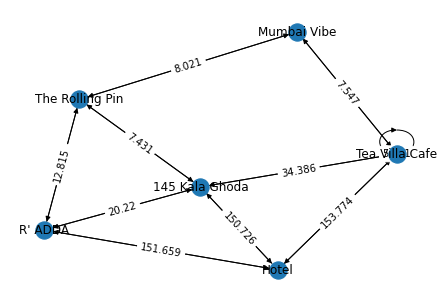

In [121]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.from_pandas_edgelist(df2_self_merge_copy2, "Restaurant Name_pri", "Restaurant Name_sec", "distance", create_using=nx.DiGraph())

pos= nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

labels = nx.get_edge_attributes(G,'distance')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()


In [122]:
#Apply travelling sales man 
tsp = nx.approximation.traveling_salesman_problem
path3=tsp(G,cycle=False)

In [123]:
path3

['The Rolling Pin',
 'Mumbai Vibe',
 'Tea Villa Cafe',
 'Hotel',
 "R' ADDA",
 '145 Kala Ghoda']

# Machine Learning

## XGboost

In [64]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
import xgboost as xgbm

In [65]:
#subset the dataset to India
df5 = df[df['Country Code']==1]

Text(0, 0.5, 'Average cost for two')

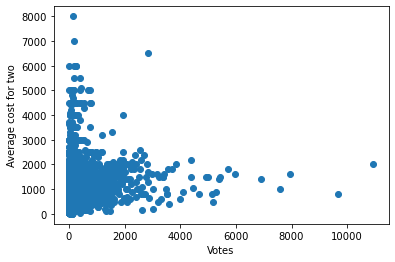

In [66]:
#scatter plot to check relationship
plt.scatter('Votes','Average Cost for two',data=df5)
plt.xlabel("Votes")
plt.ylabel("Average cost for two")

Text(0, 0.5, 'Average cost for two')

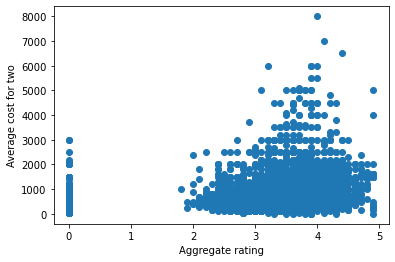

In [67]:
#scatter plot check relationship
plt.scatter('Aggregate rating','Average Cost for two',data=df5)
plt.xlabel("Aggregate rating")
plt.ylabel("Average cost for two")

In [68]:
#create dummy columns
df5_1 = pd.get_dummies(df5, columns=['City','Has Table booking',
                                     'Has Online delivery','Is delivering now',
                                     'Switch to order menu','Rating color','Rating text'])

In [69]:
#segregate x and y
X,y = df5_1[[ 'City_Agra', 'City_Ahmedabad', 'City_Allahabad',
       'City_Amritsar', 'City_Aurangabad', 'City_Bangalore', 'City_Bhopal',
       'City_Bhubaneshwar', 'City_Chandigarh', 'City_Chennai',
       'City_Coimbatore', 'City_Dehradun', 'City_Faridabad', 'City_Ghaziabad',
       'City_Goa', 'City_Gurgaon', 'City_Guwahati', 'City_Hyderabad',
       'City_Indore', 'City_Jaipur', 'City_Kanpur', 'City_Kochi',
       'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_Mangalore',
       'City_Mohali', 'City_Mumbai', 'City_Mysore', 'City_Nagpur',
       'City_Nashik', 'City_New Delhi', 'City_Noida', 'City_Panchkula',
       'City_Patna', 'City_Puducherry', 'City_Pune', 'City_Ranchi',
       'City_Secunderabad', 'City_Surat', 'City_Vadodara', 'City_Varanasi',
       'City_Vizag', 'Longitude', 'Latitude', 'Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes', 'Is delivering now_No', 'Is delivering now_Yes', 'Aggregate rating', 'Rating color_Dark Green',
       'Rating color_Green', 'Rating color_Orange', 'Rating color_Red',
       'Rating color_White', 'Rating color_Yellow', 'Rating text_Average',
       'Rating text_Excellent', 'Rating text_Good', 'Rating text_Not rated',
       'Rating text_Poor', 'Rating text_Very Good',
       'Votes']],df5_1.iloc[:, 9]


In [70]:

#data partitioning
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size = 0.3,random_state=1234)

In [71]:
#assign estimator
estimator = xgbm.XGBRegressor(objective ='reg:linear',nthread = 4, seed=123)

In [72]:
#select hyperparameter
parameters = {
    'max_depth': range (2, 8, 1),
    'n_estimators': range(5, 60, 50),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [73]:
#grid search with scoring as r-sq
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = -1,
    cv = 4,
    verbose=True)

In [74]:
#grid search to training data
grid_search.fit(train_X, train_Y)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[20:11:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...e,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                

In [75]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=55, n_jobs=4,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=123, ...)

In [76]:
#apply regressor
xgbr = xgbm.XGBRegressor(objective ='reg:linear',n_estimators=30,seed=123)

In [77]:
#fir tain data
xgbr.fit(train_X,train_Y)

[20:11:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [78]:
#predict train y
pred1 = xgbr.predict(train_X)

In [79]:
#use grid serach values to predict the outputs and calculate the r-sq for each of them
pred2 = grid_search.predict(train_X)
rmse2 = np.sqrt(MSE(train_Y,pred2))
print("Root mean square error for training set : ", rmse2)
rsq = r2_score(train_Y,pred2)
print("R-square for training set : ", rsq)

pred3 = grid_search.predict(test_X)
rmse3 = np.sqrt(MSE(test_Y,pred3))
print("Root mean square error for test set : ", rmse3)
rsq2 = r2_score(test_Y,pred3)
print("R-square for training set : ", rsq2)

Root mean square error for training set :  283.935229307837
R-square for training set :  0.7752345306157997
Root mean square error for test set :  392.68868896669017
R-square for training set :  0.5537272667048454


In [80]:
#calculate r-sq and root mean sq error to xgbr 
rmse1 = np.sqrt(MSE(train_Y,pred1))
print(rmse1)
rsq1 = r2_score(train_Y,pred1)
print(rsq)

264.6779185334321
0.7752345306157997


In [81]:
#predict test y value
pred = xgbr.predict(test_X)

In [82]:
#calculate the root mean sq error and r-sq
rmse = np.sqrt(MSE(test_Y,pred))
print(rmse)
rsq = r2_score(test_Y,pred)
print(rsq)

383.4238197920976
0.5745370493024899


NameError: name 'pyplot' is not defined

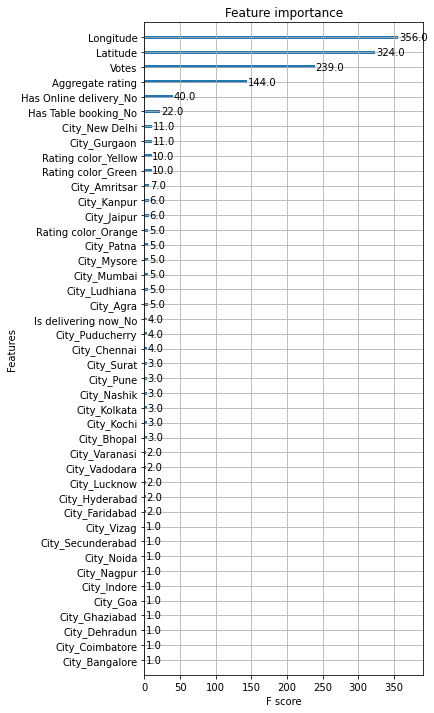

In [83]:
#visualize variable worth
from xgboost import plot_importance
ax=plot_importance(xgbr)
fig = ax.figure
fig.set_size_inches(5, 12)
pyplot.show()

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
from matplotlib import pyplot as plt
import itertools

In [85]:
#subset the country code to india
df6 = df[df['Country Code']==1]

In [86]:
#create a binary coding for categorical Has online delivery
df6['Online_delivery'] = np.where(df6['Has Online delivery']=='Yes',1,0)

/var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ipykernel_37133/1388362009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Online_delivery'] = np.where(df6['Has Online delivery']=='Yes',1,0)


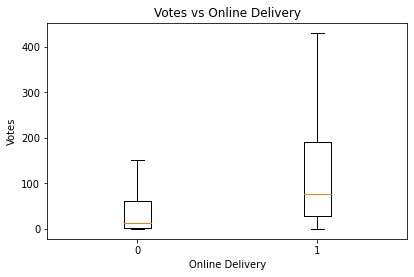

In [107]:
import matplotlib.pyplot as plt

data_0 =  df6[df6['Online_delivery']==0]['Votes']
data_1 =  df6[df6['Online_delivery']==1]['Votes']

data = [data_0,data_1]

fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
 
# Creating plot
bp = ax.boxplot(data,showfliers=False,positions = [0,1])

ax.set_title('Votes vs Online Delivery')
ax.set_xlabel('Online Delivery')
ax.set_ylabel('Votes')

 
# show plot
plt.show()

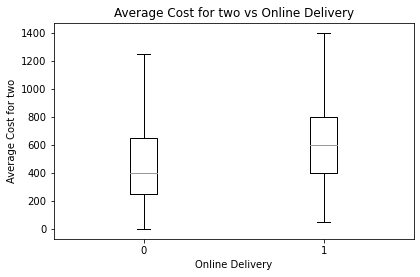

In [108]:
import matplotlib.pyplot as plt

data_0 = df6[df6['Online_delivery']==0]['Average Cost for two']
data_1 = df6[df6['Online_delivery']==1]['Average Cost for two']

data = [data_0,data_1]

fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
 
# Creating plot
bp = ax.boxplot(data,showfliers=False,positions = [0,1])

ax.set_title('Average Cost for two vs Online Delivery')
ax.set_xlabel('Online Delivery')
ax.set_ylabel('Average Cost for two')

# show plot
plt.show()

In [87]:
#create dummies to categorical variables
df6_1 = pd.get_dummies(df6, columns=['City','Has Table booking','Rating color','Rating text'])

In [88]:
df6_1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Votes', 'Online_delivery', 'City_Agra',
       'City_Ahmedabad', 'City_Allahabad', 'City_Amritsar', 'City_Aurangabad',
       'City_Bangalore', 'City_Bhopal', 'City_Bhubaneshwar', 'City_Chandigarh',
       'City_Chennai', 'City_Coimbatore', 'City_Dehradun', 'City_Faridabad',
       'City_Ghaziabad', 'City_Goa', 'City_Gurgaon', 'City_Guwahati',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kanpur',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Mangalore', 'City_Mohali', 'City_Mumbai', 'City_Mysore',
       'City_Nagpur', 'City_Nashik', 'City_New Delhi', 'City_Noida',
       'City_Panchkula', 'City_Patna', 'City_Puducherry', 'City_Pune

In [89]:
#segregate the predictor and target variables
X,y = df6_1[['City_Agra',
       'City_Ahmedabad', 'City_Allahabad', 'City_Amritsar', 'City_Aurangabad',
       'City_Bangalore', 'City_Bhopal', 'City_Bhubaneshwar', 'City_Chandigarh',
       'City_Chennai', 'City_Coimbatore', 'City_Dehradun', 'City_Faridabad',
       'City_Ghaziabad', 'City_Goa', 'City_Gurgaon', 'City_Guwahati',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kanpur',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Mangalore', 'City_Mohali', 'City_Mumbai', 'City_Mysore',
       'City_Nagpur', 'City_Nashik', 'City_New Delhi', 'City_Noida',
       'City_Panchkula', 'City_Patna', 'City_Puducherry', 'City_Pune',
       'City_Ranchi', 'City_Secunderabad', 'City_Surat', 'City_Vadodara',
       'City_Varanasi', 'City_Vizag','Longitude', 'Latitude','Average Cost for two','Has Table booking_No',
       'Has Table booking_Yes','Price range', 'Aggregate rating', 'Rating color_Dark Green',
       'Rating color_Green', 'Rating color_Orange', 'Rating color_Red',
       'Rating color_White', 'Rating color_Yellow', 'Rating text_Average',
       'Rating text_Excellent', 'Rating text_Good', 'Rating text_Not rated',
       'Rating text_Poor', 'Rating text_Very Good',
       'Votes']], df6_1.iloc[:, 17]

In [90]:
#segregate the train and test dataset (data partitioning)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=1)

In [91]:
#Apply decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [92]:
#calculate accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7170900692840647


[Text(167.4, 190.26, 'X[62] <= 20.5\nentropy = 0.855\nsamples = 7786\nvalue = [5607, 2179]'),
 Text(83.7, 135.9, 'X[62] <= 1.5\nentropy = 0.497\nsamples = 3689\nvalue = [3287, 402]'),
 Text(41.85, 81.53999999999999, 'X[43] <= 77.054\nentropy = 0.184\nsamples = 1432\nvalue = [1392, 40]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 299\nvalue = [299, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.22\nsamples = 1133\nvalue = [1093, 40]'),
 Text(125.55000000000001, 81.53999999999999, 'X[45] <= 175.0\nentropy = 0.635\nsamples = 2257\nvalue = [1895, 362]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.188\nsamples = 279\nvalue = [271, 8]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.678\nsamples = 1978\nvalue = [1624, 354]'),
 Text(251.10000000000002, 135.9, 'X[44] <= 28.395\nentropy = 0.987\nsamples = 4097\nvalue = [2320, 1777]'),
 Text(209.25, 81.53999999999999, 'X[62] <= 480.5\nentropy = 0.608\nsamples = 610\nvalue = [519, 91]'),
 Text(188.325000

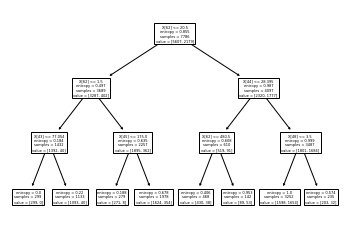

In [95]:
#plot decision tree
columns = X_train.columns
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)

Text(0.5, 1.0, 'Decision Trees')

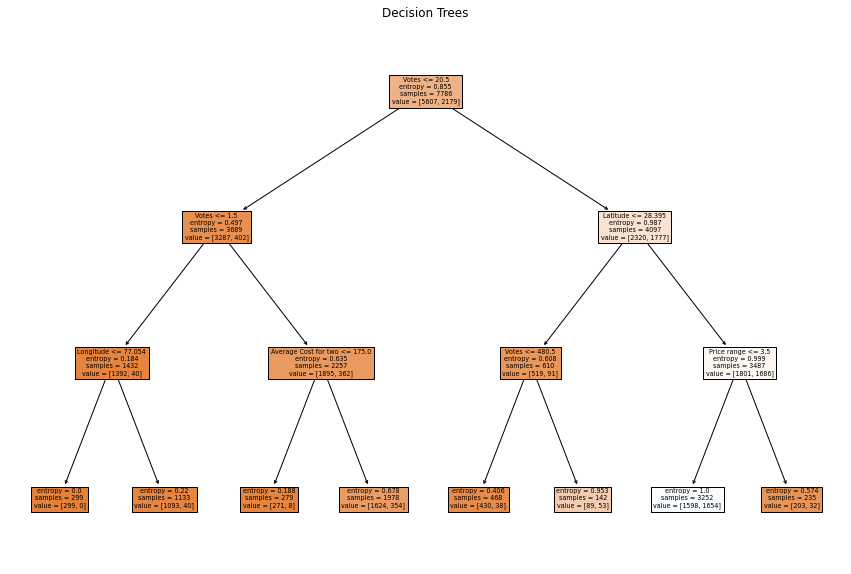

In [96]:
#plot decision tree
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names = columns, filled = True)
plt.title('Decision Trees')

In [97]:
#function for AUC calculation
def acu(clf, X_train, X_test, y_train, y_test):
 
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)
    print(f"""Training AUC: {auc_train} Testing AUC: {auc_test}""")
 
    return y_test_score

In [98]:
y_test_score=acu(clf, X_train, X_test, y_train, y_test)

Training AUC: 0.7736761307593201 Testing AUC: 0.7660606979073323


In [99]:
#function for ploting the AUC and ROC curve
def plot_roc_curve(y_test, y_test_score):

 
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr,label="ROC curve (area = %0.2f)" %roc_auc)
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [100]:
#Confusion matrix
def show_cm(y_true, y_pred, class_names=None, model_name=None):
    
 
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
    if class_names:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    else:
        class_names = set(y_true)
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.0
    for i, j in itertools.product(range(cf.shape[0]),
                               range(cf.shape[1])):
        plt.text(j, i, cf[i, j],horizontalalignment="center",
            color="white" if cf[i, j] > thresh else "black")
    plt.colorbar()

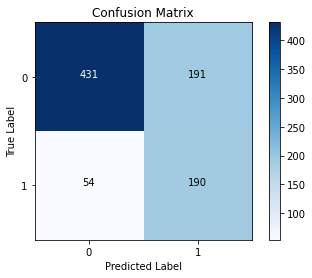

In [101]:
y_true=y_test
show_cm(y_true, y_pred)

In [102]:
#calculate variable importance
importance = clf.feature_importances_

In [104]:
importance = pd.DataFrame(importance,columns=['Var_Imp'])
colnames = pd.DataFrame(X_train.columns, columns = ['Variable'])
var_imp = pd.concat([colnames,importance], axis = 1)

In [105]:
Imp_var = var_imp[var_imp['Var_Imp']>0].sort_values(['Var_Imp'])

In [106]:
Imp_var.sort_values(['Var_Imp'], ascending = False)

,Variable,Var_Imp
62,Votes,0.737582
44,Latitude,0.145579
48,Price range,0.075151
45,Average Cost for two,0.031162
43,Longitude,0.010526


[20:10:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regress